<a href="https://colab.research.google.com/github/GurinderbeerSingh/learnGitHub/blob/master/MobilePriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset: Mobile Price Classification
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Upload data files from local system.
from google.colab import files
uploaded = files.upload()


In [7]:
from google.colab import drive
drive.mount('/ColabNotebooks/MobilePriceClassificationData')

MessageError: ignored

In [2]:
MOBILE_TRAINING_DATA_URL = "train.csv"
MOBILE_TEST_DATA_URL = "test.csv"

def load_mobile_training_data(mobile_train_data_url = MOBILE_TRAINING_DATA_URL):
    return pd.read_csv(mobile_train_data_url)

In [3]:
# Milestone 1: Reading CSV file to a DataFrame (read_csv() function) and showing the initial 5 rows (head() function)

mobile_train = load_mobile_training_data()
mobile_train.head()

FileNotFoundError: ignored

### Milesteon 2: Univariate Analysis

2.1 Descriptive Statistics (describe() function)

2.2 Identifying presence of missing values and duplicates for each column.

2.3 Box Plots or Histograms for Numeric Columns;

2.4 Pie charts or bar charts (countplot() function) for Categorical Columns (if present);

2.5 Line plots for DateTime columns (i.e. Years, Day, Month - if present); 



In [ ]:

mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data description
1. Dataset contains 20 columns.19 x columns and 1 y column 
2. All columns contain numeric values
3. The data has total of 2000 rows
4. Categorical columns: dual_sim (0,1), blue (0,1), four_g, wifi(0,1), touch_screen (0,1), three_g(0,1). 
5. There is no DateTime columns. 
6. Y columns is price_range and it is a categorical columns with categories (0, 1, 2, 3)

In [ ]:
# 18 Integer columns and 2 float columns (out of 20, 6 categorical columns)

mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# There are 4 price ranges, and the training datas has equal number of input test data for each category. 
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

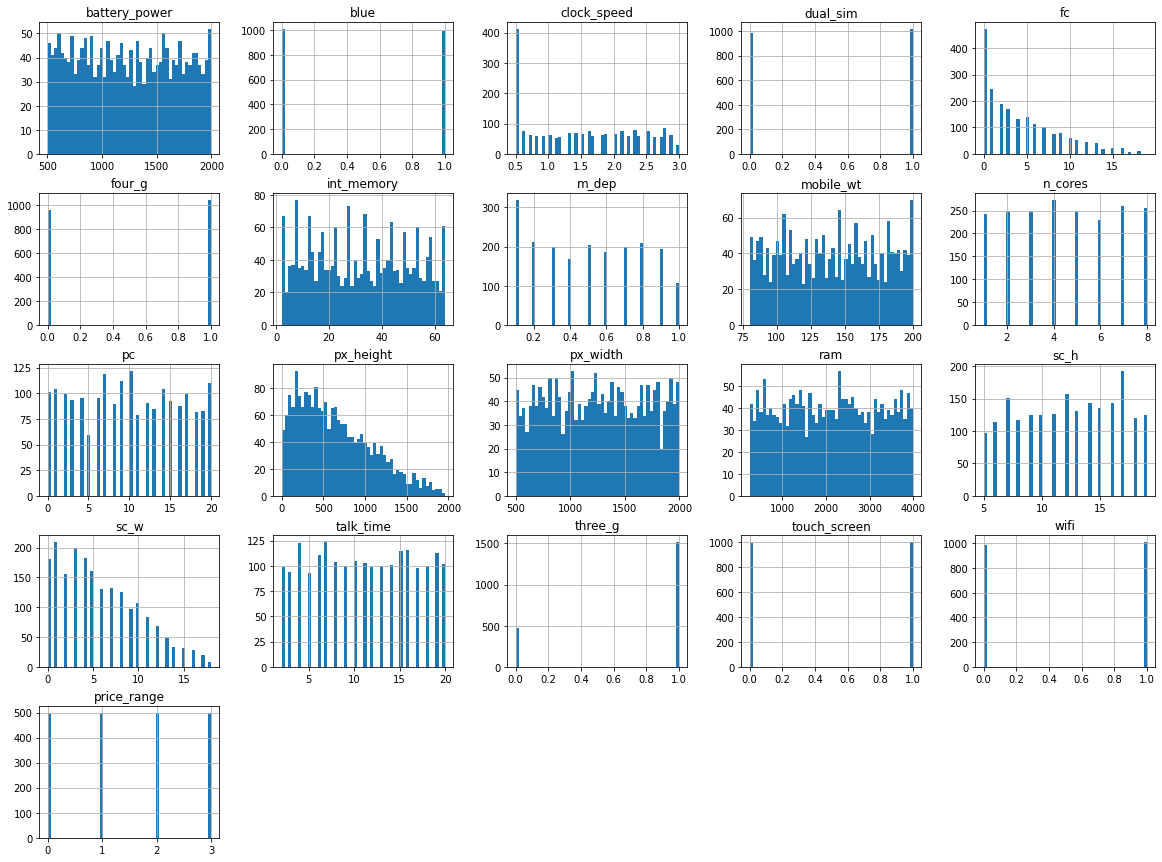

In [ ]:

mobile_train.hist(bins=50, figsize=(20,15))
plt.show()


# Histogram Plot analysis
1. The attributes have different scales so later feature scaling will need to be performed.
2. Looking at price_range plit, there is equal distribution of input values for each price_range category.
3. Clock_speed: High number of inputs have 0.5 clock_speed and remaning values seem to have equal distribution for clock_speeds upto 3.0
4. Categorical columns touch_screen, wifi, four_g, dual_sim, blue seem to have almost equal distribution of input values for each category. Whereas three_g column has large number of values of category (1).


## 3 Multivariate Analysis
### 3.1 Scatter plots (+ jointplot) to compare numeric columns;
### 3.2 Count plots to compare categorical columns;


In [ ]:
corr_matrix = mobile_train.corr()
corr_matrix["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

## Correlations
### Standand correlation coefficient
1. Ram has very high positive correlation with price_range
2. battery_power, px_width, px_height has significant correlation with price_range

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9355e8c6d0>,
      dtype=object)

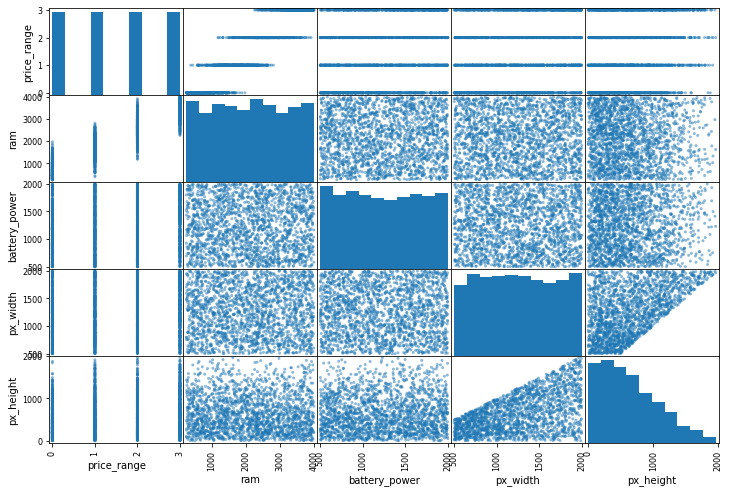

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["price_range","ram", "battery_power", "px_width", "px_height"]
scatter_matrix(mobile_train[attributes], figsize=(12,8))

### We can clearly identify that ram is the strongest attribute to predict the mobile price range